### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [326]:
# Show all columns
pd.set_option('display.max_columns', None)

In [327]:
data = pd.read_csv('data/coupons.csv')

In [328]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [330]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [371]:
# Review unique values for all columns
column_list = data.columns.values.tolist()
for column_name in column_list:
      print("----------------------")
      print("Column:", column_name)
      print(data[column_name].unique())

----------------------
Column: destination
['No Urgent Place' 'Home' 'Work']
----------------------
Column: passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
----------------------
Column: weather
['Sunny' 'Rainy' 'Snowy']
----------------------
Column: temperature
[55 80 30]
----------------------
Column: time
['2PM' '10AM' '6PM' '7AM' '10PM']
----------------------
Column: coupon
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']
----------------------
Column: expiration
['1d' '2h']
----------------------
Column: gender
['Male' 'Female']
----------------------
Column: age
[21 46 26 31 41 50 36 20]
----------------------
Column: maritalStatus
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
----------------------
Column: has_children
[0 1]
----------------------
Column: education
['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'

3. Decide what to do about your missing data -- drop, replace, other...


a. Review missing values for target attributes, I need to evaluate the % to decide to drop them or not
```
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
```


In [332]:
percent_missing = data.isnull().sum() / len(data) * 100
percent_missing[["car","Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]]

car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64

b. The missing values in the target attributes is small(less than 2%) so I decided to drop them

In [368]:
# Drop the nulls for the target columns
data = data.dropna(subset=["Bar", "CoffeeHouse", "CarryAway","RestaurantLessThan20","Restaurant20To50"])

# About the car 99%, I will replace the null with No Answer
data["car"] = data["car"].fillna("No Answer")

c. Replace string values to numerical

In [369]:
# Age: it contaings string with numbers and letters, so I decided to conver to numerical values.
data["age"] = pd.to_numeric(data["age"].str.replace('50plus', '50').str.replace('below21', '20'))

4. What proportion of the total observations chose to accept the coupon? 



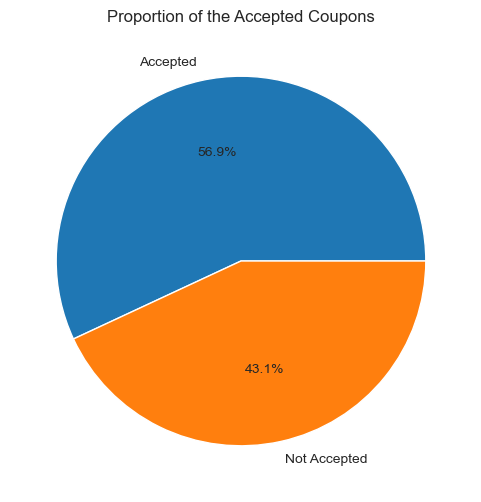

In [372]:
coupons_count = data["Y"].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
coupons_count["Y"] = coupons_count["Y"].replace(0, 'Not Accepted').replace(1, 'Accepted')

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(coupons_count['count'], labels = coupons_count["Y"], autopct='%1.1f%%')
plt.title('Proportion of the Accepted Coupons')
plt.show()

Answer: 56.9% accepted the coupon

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Coupon')

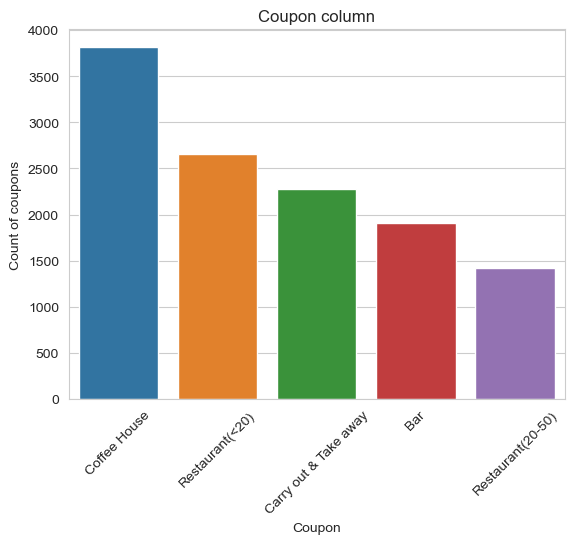

In [373]:
coupons_df = data["coupon"].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
ax = sns.barplot(coupons_df, x="coupon", y = "count")
plt.title('Coupon column')
plt.xticks(rotation = 45)
ax.set_ylabel("Count of coupons")
ax.set_xlabel("Coupon")

6. Use a histogram to visualize the temperature column.

[Text(0.5, 0, 'Temperature'), Text(0, 0.5, 'Count')]

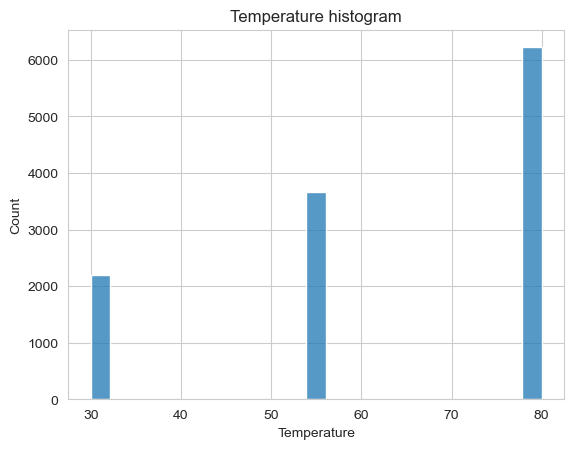

In [374]:
ax= sns.histplot(data['temperature'])
plt.title('Temperature histogram')
ax.set(xlabel='Temperature', ylabel='Count')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [375]:
bar_coupons_df = data.query("coupon == 'Bar'")
bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,No Answer,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,No Answer,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,No Answer,never,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,No Answer,never,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,No Answer,never,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,No Answer,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,No Answer,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,No Answer,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,No Answer,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


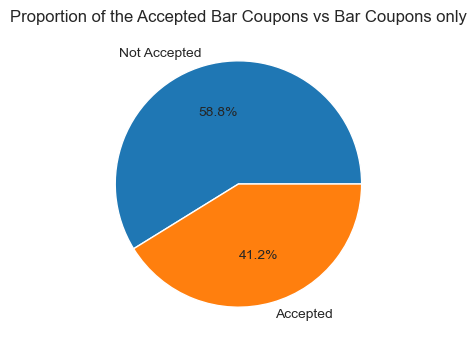

In [376]:
# Getting the values to get proportion of Accepted Bar coupones vs All Bar Coupons
bar_coupons_count = bar_coupons_df["Y"].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
bar_coupons_count['Y'] = bar_coupons_count["Y"].replace(0, 'Not Accepted').replace(1, 'Accepted')

# Pie chart of the proportion values
sns.set_style("whitegrid")
plt.figure(figsize=(4,4))
plt.pie(bar_coupons_count['count'], labels = bar_coupons_count["Y"], autopct='%1.1f%%')
plt.title('Proportion of the Accepted Bar Coupons vs Bar Coupons only')
plt.show()

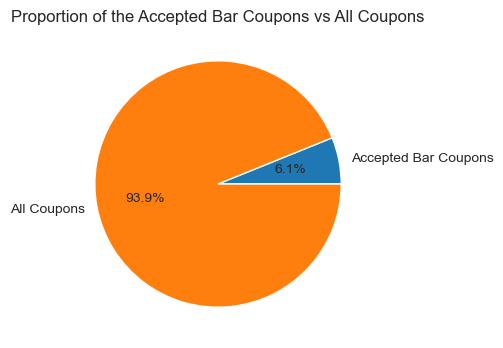

In [377]:
# Getting the values to get proportion of Accepted Bar coupones vs All Coupons
coupons_data = [['Accepted Bar Coupons', bar_coupons_count.query("Y == 'Accepted'")[["count"]].values[0][0]], ['All Coupons', len(data)]]
accepted_bar_allcoupons = pd.DataFrame(coupons_data, columns=['label', 'count'])

# Pie chart of the proportion values
sns.set_style("whitegrid")
plt.figure(figsize=(4,4))
plt.pie(accepted_bar_allcoupons['count'], labels = accepted_bar_allcoupons["label"], autopct='%1.1f%%')
plt.title('Proportion of the Accepted Bar Coupons vs All Coupons')
plt.show()

### Answer:  

For bar coupons only the proportion of the accepted is: 41.2%  
For all coupons the proportion of the accepted  is: 6.1%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [407]:
# Bar frequency meaning: Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
# The current Bar values are: 'never', 'less1', '1~3', 'gt8', '4~8'
three_or_fewer = ['never', 'less1', '1~3']
three_or_fewer_count = bar_coupons_df.query("Bar in @three_or_fewer & Y == 1")['Bar'].count()
visited_bar_threeorfewer =  three_or_fewer_count / len(bar_coupons_df) * 100
print("Those who visited bar three or fewer times: %.2f%%" % visited_bar_threeorfewer)

more_than_three = ['4~8', 'gt8']
more_than_three_count = bar_coupons_df.query("Bar in @more_than_three & Y == 1")['Bar'].count()
visited_bar_morethan3 =  more_than_three_count / len(bar_coupons_df) * 100
print("Those who visited bar more than three times: %.2f%%" % visited_bar_morethan3)

Those who visited bar three or fewer times: 33.51%
Those who visited bar more than three times: 7.68%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [410]:
# Get acceptance rate for driver who visted the bar more than once and be over 25 year
more_than_once = ['1~3', '4~8', 'gt8']
moreonce_over25_count = bar_coupons_df.query('Bar in @more_than_once & age > 25 & Y == 1')['Bar'].count()
visited_bar_moreonce_over25 = moreonce_over25_count / len(bar_coupons_df) * 100
print("Drivers who visited bar more once time and over 25: %.2f%%" % visited_bar_moreonce_over25)

# Get acceptance rate for the others
others_count = bar_coupons_df.query('Y == 1' )['Bar'].count() - moreonce_over25_count
print("The others: %.2f%%" % (others_count / len(bar_coupons_df) * 100))

Drivers who visited bar more once time and over 25: 14.53%
The others: 26.66%


### Answer
The others group has acceptance rate greater than the more than once & over 25 age group, this could have happened because the drivers under 25 years old are more likely to accept the coupon and migth go to the bar than the olders.

Text(0.5, 1.0, 'Coupon acceptance by Age')

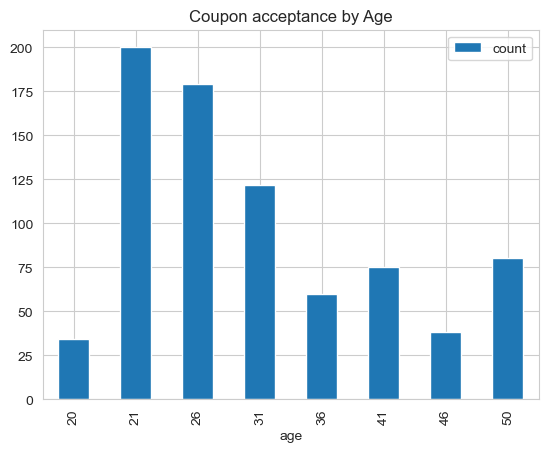

In [466]:
visitbar_byage1 = bar_coupons_df.query('Y == 1' ).groupby(['age'])[['age']].value_counts().reset_index()
visitbar_byage1.plot(kind='bar', x='age', y = 'count' )
plt.title('Coupon acceptance by Age')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  